In [1]:
## Create a tmp file containing only the lines containing "Bilayer Surface Tension" and the corresponding values

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle
# Change the default pyplot parameters to put a readable size of text
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
labels = []
files = glob.glob('Results/stabilizeLipid8/*/dmpcas.*')
tmp_files = []
for i in range(len(files)):
    labels.append(str(files[i].strip().split('/')[2]).strip().split('_')[-1])
    tmp_files.append(str(str(('/').join(files[i].split('/')[0:3])) + '/' + str(files[i].split('.')[-1]) + '.tmp'))
    if os.path.exists(tmp_files[i]):
        os.system(f'rm { tmp_files[i] }')
    os.system('grep -A 1 "Bilayer Surface Tension" {} > {}'.format(files[i], tmp_files[i]))

labelValue = {}
for i in range(len(files)):
    with open(tmp_files[i], 'rt') as rf:
        localLines = []
        for line in rf:
            line = (line.strip().split())[0]
            localLines.append(line)
        goodLines = []
        for ind in range(1,54,3):
            goodLines.append(float(localLines[ind]))
        labelValue[labels[i]] = goodLines

In [3]:
BST_df = pd.DataFrame.from_dict(labelValue, orient='columns').drop([0,1,2,3,4])

is_close_to_0 = (BST_df.mean()<0.5) & (BST_df.mean()>-0.5) 

# display(BST_df.iloc[:,is_close_to_0.values])
# display((BST_df.iloc[:,is_close_to_0.values].mean()))

In [4]:
compositelamella_db = []
with open('Results/stabilizeLipid8/compositelamellaSims', 'rt') as rf:
    for line in rf:
        compositelamella_db.append(line)

# Creates a list of all labels to drop because they were run with composite lamella. Modulo 2 was applied to avoid repetition.
drop_labels = []
for i in range(0, len(compositelamella_db),2):
    drop_labels.append(float(str(compositelamella_db[i].strip().split('/')[0]).strip().split('_')[-1]))

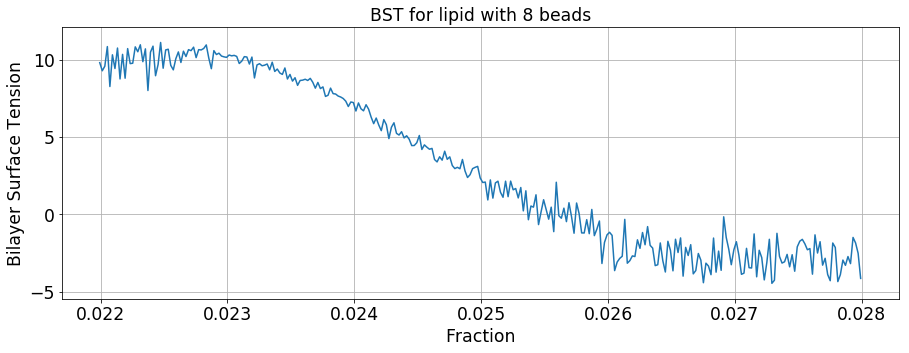

In [5]:
BST_df2=BST_df
# Changes column names to float and reorders columns according to the fraction
newCol = []
for col in BST_df2.columns:
    newCol.append(float(col))
BST_df2.columns = newCol
newCol.sort()
BST_df2 = BST_df2[newCol]
BST_df2 = BST_df2.drop(drop_labels, axis = 1)

# Changes column names to the actual fraction
newCol2 = [i * 0.019994 for i in BST_df2.columns]
BST_df2.columns = newCol2



plt.plot(BST_df2.columns, BST_df2.mean())
plt.xlabel('Fraction')
plt.ylabel('Bilayer Surface Tension')
plt.grid()
plt.ylim([BST_df2.mean().min()-1, BST_df2.mean().max()+1])
plt.title('BST for lipid with 8 beads');
plt.savefig('Results/stabilizeLipid8/lipid8_SL.png')

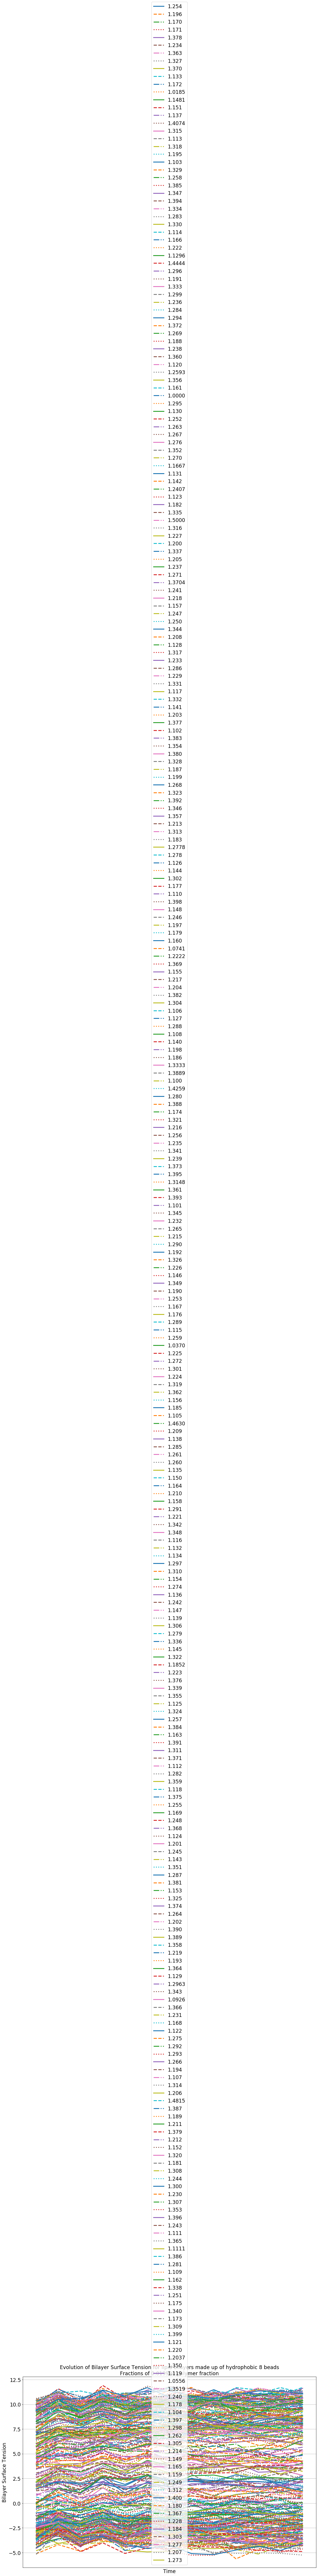

In [6]:
maxLines = len(localLines)
x_axis = list(range(1, maxLines))

# Changes the line type for each lines
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

plt.figure(figsize=(18,12))
for label in labels:
    plt.plot(labelValue[label][5:], next(linecycler), linewidth=3)
plt.legend(labels)
plt.grid()
plt.xlabel('Time')
plt.xticks([])
plt.ylabel('Bilayer Surface Tension')
plt.title('Evolution of Bilayer Surface Tension for lipid bilayers made up of hydrophobic 8 beads\nFractions of 0.019994 polymer fraction')
plt.show()